\newpage

## Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.model_selection import train_test_split
from fancyimpute import SoftImpute
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1.

Chronic Kidney Disease (CKD) is a progressive loss of kidney function. Today, the prevalence of CKD is increasing globally, and the impact of this disease on our society is enormous.  
Our task is to classify patients into two groups based on the parameters given by the dataset. The first group included patients with chronic kidney disease, and the second group included patients without the disease. The dataset contains some parameters that help us in classification, such as age, blood pressure, etc. These parameters help us classify and predict chronic kidney disease. The last parameter is the patient's category, showing whether chronic kidney disease (ckd/notckd) is present.

# 2.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
merged_dataset = pd.concat([X, y], axis=1)

In [3]:
merged_dataset.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [4]:
num_column=merged_dataset.select_dtypes(include=["float64"]).columns
obj_column=merged_dataset.select_dtypes(include=["object"]).columns

In [5]:
scaler = StandardScaler()
merged_dataset[num_column]= pd.DataFrame(scaler.fit_transform(merged_dataset[num_column]), columns=merged_dataset[num_column].columns)

In [6]:
merged_dataset.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,NaN,normal,notpresent,notpresent,-0.341498,...,0.569881,-0.206202,0.481295,yes,yes,no,good,no,no,ckd
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,NaN,normal,notpresent,notpresent,NaN,...,-0.098536,-0.818559,NaN,no,no,no,good,no,no,ckd
2,0.613295,0.258373,-1.297699,0.727772,2.323069,normal,normal,notpresent,notpresent,3.473064,...,-0.878356,-0.308261,NaN,no,yes,no,poor,no,yes,ckd
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,normal,abnormal,present,notpresent,-0.392022,...,-0.766953,-0.580420,-0.788961,yes,no,no,poor,yes,yes,ckd
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,normal,normal,notpresent,notpresent,-0.530963,...,-0.432744,-0.376301,-0.104977,no,no,no,good,no,no,ckd


In this step I standardized all the numeric variables. If the predictor variables are not standardized, larger scale variables will dominate the classification results. By standardizing predictor variables, each feature can be treated equally to avoid bias in the results.

In [7]:
replacements = {
    'poor' : 0.0,
    'good' : 1.0,
    'normal' : 1.0,
    'abnormal' : 0.0,
    'notpresent' : 0.0,
    'present' : 1.0,
    'yes' : 1.0,
    'no' : 0.0,
    'ckd': 1.0,
    'notckd':0.0
}


merged_dataset_1 = merged_dataset.replace(replacements)

merged_dataset_1['dm'] = pd.to_numeric(merged_dataset_1['dm'], errors='coerce')
merged_dataset_1['class'] = pd.to_numeric(merged_dataset_1['class'], errors='coerce')
print(merged_dataset_1.dtypes)
merged_dataset_1.head(5)


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,NaN,1.0,0.0,0.0,-0.341498,...,0.569881,-0.206202,0.481295,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,NaN,1.0,0.0,0.0,NaN,...,-0.098536,-0.818559,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,3.473064,...,-0.878356,-0.308261,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-0.392022,...,-0.766953,-0.580420,-0.788961,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-0.530963,...,-0.432744,-0.376301,-0.104977,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Then we convert the categorical variables to numerical category.

# 3.

In [8]:
print(merged_dataset.shape)
print(merged_dataset.dtypes)

(400, 25)
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object


In [9]:
merged_dataset.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00


(1): There are 400 observations and 25 variables. (2): Also, there are two data types: floating-point numbers(float64), and object. (3): As can be seen from the above, most variables do not have 400 observations. This may be because there are some missing values in it. As can be seen in the table, there are 388 observations for blood pressure(bp), their mean value is 0.000000, and the range is -1.936857 to 7.575807. In addition, blood glucose random(bgr) has 356 observations. The mean value of blood glucose random(bgr) is 3.991813e-17, and the range is -1.591967e+00 to 4.319341e+00. The standard deviation of blood glucose random(bgr) is 1.001407e+00.

# 4.

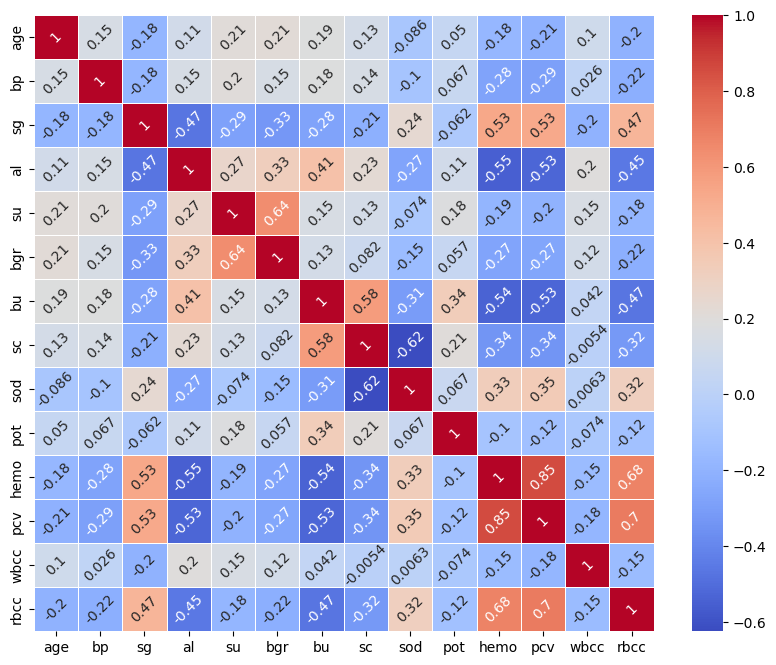

In [10]:
df=merged_dataset[num_column]
df=df.apply(lambda x: x.fillna(x.mean()), axis=0)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 10, "rotation": 45})
plt.show()

(1): From the heat map, I found a low correlation of -0.0054 between wbcc and sc. This shows that there is a poor correlation between serum creatinine levels and white blood cell counts.  
(2): There is a highly positive correlation between packed cell volume(pcv) and hemoglobin(hemo), which is 0.85. This is because red blood cells carry hemoglobin, and the amount of hemoglobin determines their oxygen-carrying capacity. Therefore, hematocrit and hemoglobin concentration will be highly positively correlated. These two features are highly correlated, so one feature can be selected and the other feature ignored. This can reduce the dimensionality of the feature space and avoid the introduction of redundant information.  
(3): There is an inverse correlation between serum creatinine levels and sodium levels, with a value of -0.63. This indicates that when serum creatinine levels in the body increase, sodium levels decrease accordingly. Both features can be selected because they are likely to both contribute to the results.

# 5.

In [11]:
missing_values = merged_dataset_1.isnull().sum()
merged_dataset_dropna=merged_dataset_1.fillna(merged_dataset_1.median())

merged_dataset_num=merged_dataset_dropna[num_column]
merged_dataset_num.head(5)
merged_dataset_dropna.head(5)
cat = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

for col in cat:
    merged_dataset_dropna[col] = pd.Categorical(merged_dataset_dropna[col]).codes
merged_dataset_dropna.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc         int8
pc          int8
pcc         int8
ba          int8
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn         int8
dm          int8
cad         int8
appet       int8
pe          int8
ane         int8
class       int8
dtype: object

Since there are many missing values in the dataset, we use the median to replace missing values instead of deleting them directly. Because directly deleting missing values will cause the data set to lose a lot of data. Filling missing values with the median ensures data integrity.

# 6.

In [12]:
from scipy import stats
z_score=np.abs(stats.zscore(merged_dataset_num))

within_two_std_dev = np.sum(np.abs(stats.zscore(merged_dataset_num)) <= 2)

print(within_two_std_dev)

threshold = 2
outlier = (z_score > threshold)
X_without_outliers = merged_dataset_dropna[~outlier.any(axis=1)]
X_without_outliers.head(5)

age     380
bp      394
sg      393
al      375
su      370
bgr     377
bu      379
sc      390
sod     391
pot     398
hemo    387
pcv     387
wbcc    385
rbcc    377
dtype: int64


c:\Users\zjb\.conda\envs\proj02\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,1,1,0,0,-0.341498,...,0.569881,-0.206202,0.481295,1,1,0,1,0,0,1
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1,1,0,0,-0.530963,...,-0.432744,-0.376301,-0.104977,0,0,0,1,0,0,1
5,0.496661,0.990117,-0.421814,1.468092,-0.410106,1,1,0,0,-0.935155,...,0.012867,-0.206202,-0.300401,1,1,0,1,1,0,1
8,0.030128,1.721860,-0.421814,1.468092,-0.410106,1,0,1,0,-0.126771,...,-0.655550,0.406155,-0.691249,1,1,0,1,0,1,1
12,0.963195,-0.473370,-0.421814,1.468092,0.500952,1,1,1,0,0.757399,...,-1.212564,1.290671,-1.277521,1,1,1,0,1,0,1


First I use Z-score to find the values of the data set that are within two standard deviations. I found that over ninety percent of the data fell between two standard deviations. Therefore, I set the threshold to 2 and remove outliers with Z-scores greater than the threshold. This not only ensures the integrity of the data but also reduces the interference of outliers on the data.

# 7.

c:\Users\zjb\.conda\envs\proj02\lib\site-packages\threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

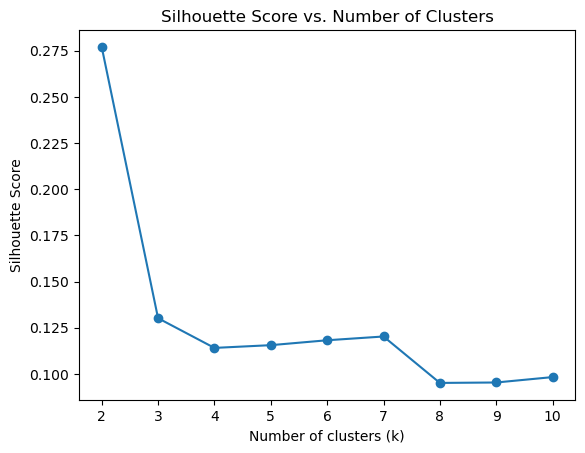

In [13]:
x=X_without_outliers.drop('class', axis=1)
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels_km = km.fit_predict(x)
    silhouette_avg_km = silhouette_score(x, cluster_labels_km)
    silhouette_scores.append(silhouette_avg_km)

plt.plot(range(2, 11), silhouette_scores, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

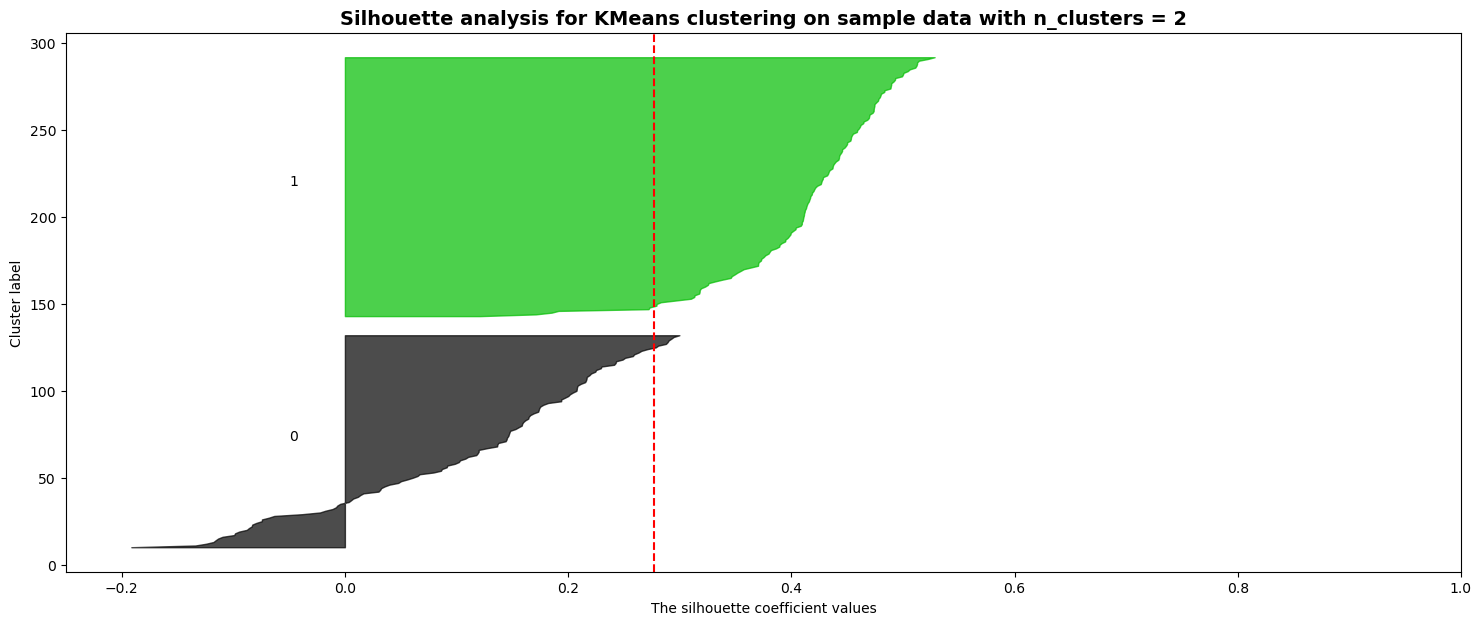

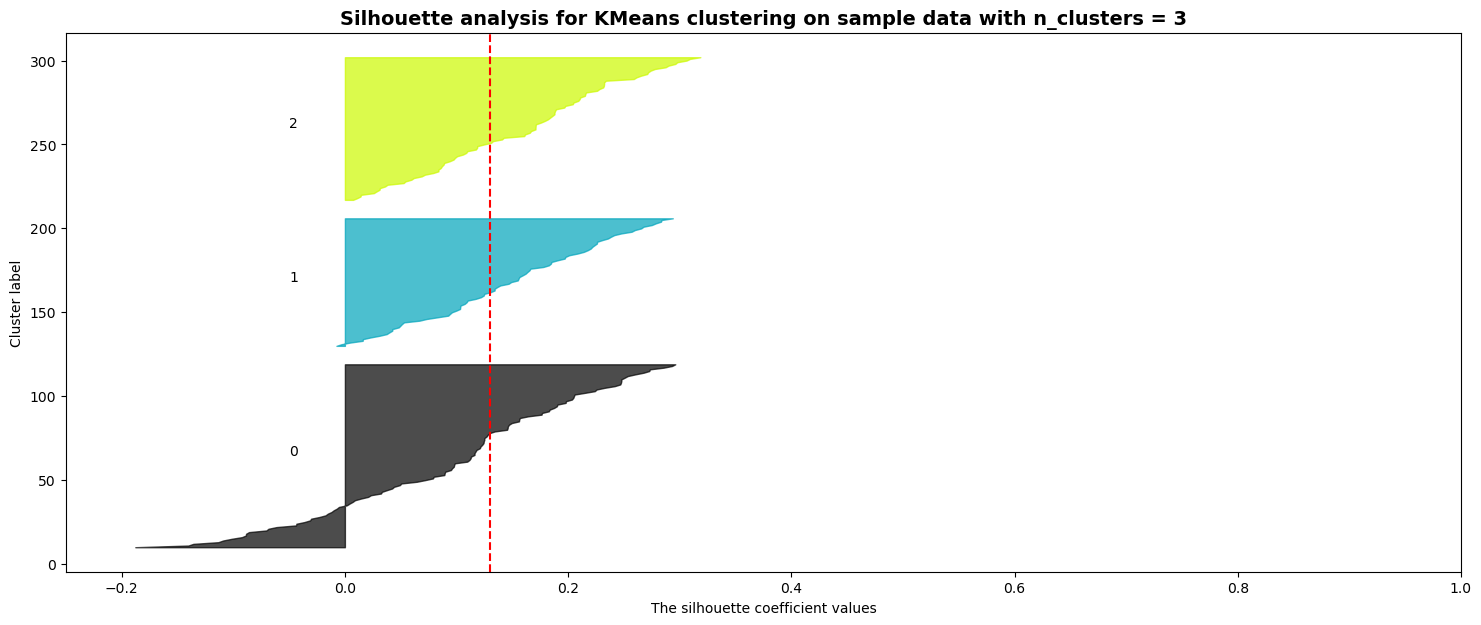

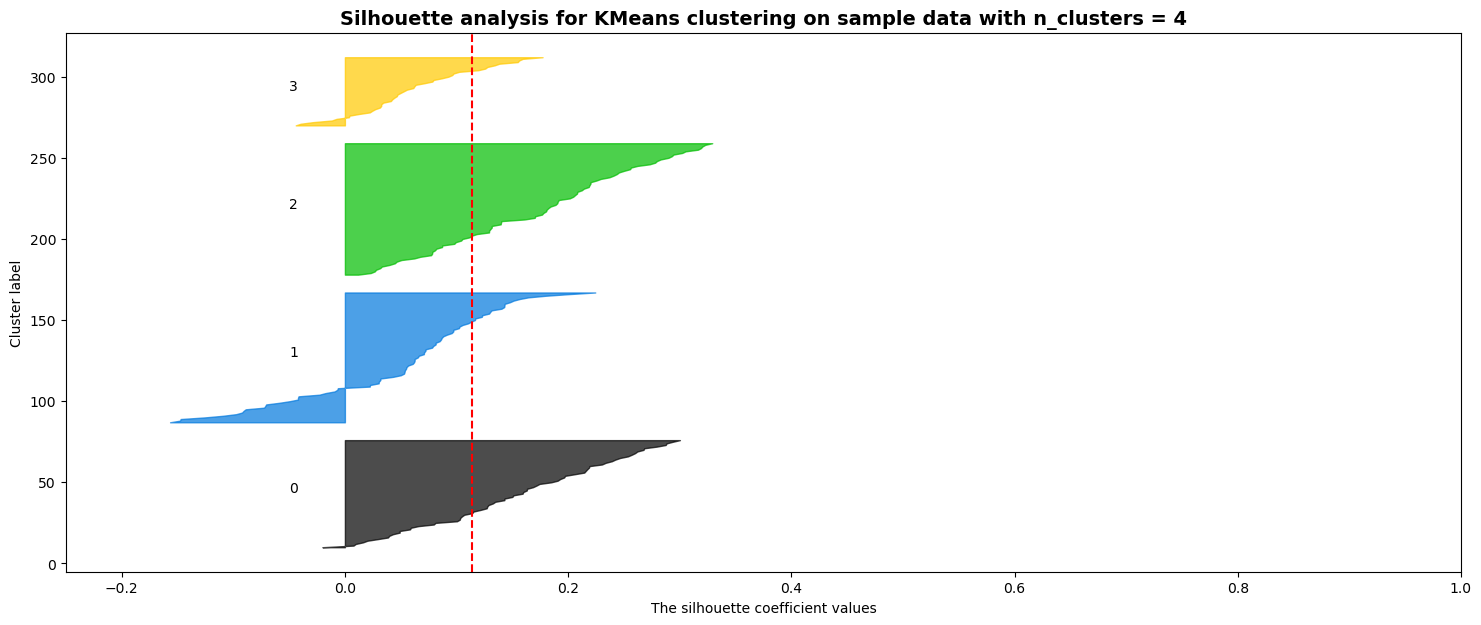

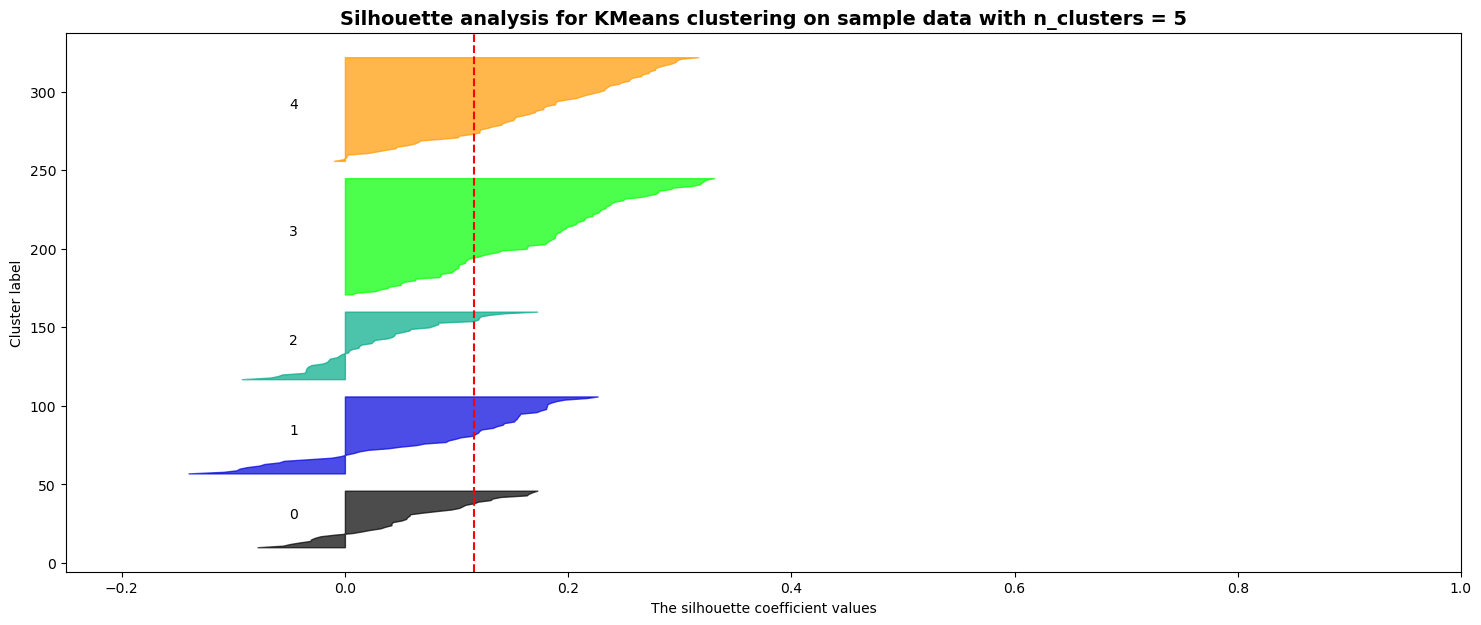

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(x)
    silhouette_avg_km = silhouette_score(x, cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

In [15]:
x=X_without_outliers.drop('class', axis=1)
pca_X = PCA()
pca_loadings = pd.DataFrame(pca_X.fit(x).components_.T, columns=x.columns)

In [16]:
pc_scores = pd.DataFrame(pca_X.fit_transform(x), columns=x.columns, index=x.index)
pc_scores.head(5)
pc_scores.var()
np.sum(pc_scores.var())
print(pca_X.explained_variance_ratio_)

[0.38365532 0.09934273 0.08193824 0.06403469 0.05423992 0.04906514
 0.03785627 0.03741964 0.03260594 0.02544981 0.01967067 0.01780847
 0.01625843 0.01420618 0.01129816 0.00965426 0.00885654 0.00798794
 0.00724538 0.0054003  0.00474354 0.00432561 0.00374123 0.00319562]


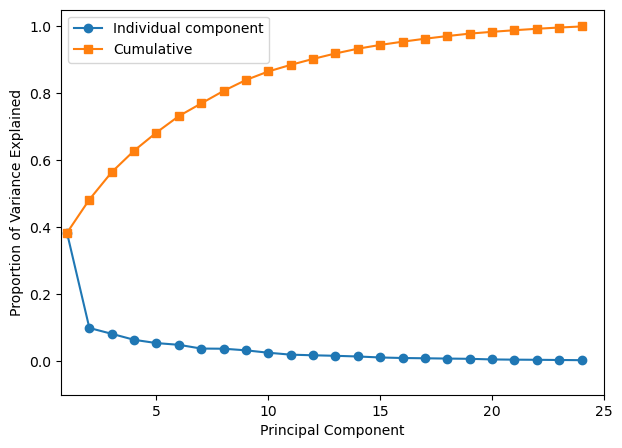

In [17]:
plt.figure(figsize=(7,5))

plt.plot(range(1,len(pca_X.explained_variance_ratio_) + 1), pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(range(1,len(pca_X.explained_variance_ratio_) + 1), np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,25)
plt.ylim(-0.1,1.05)
plt.legend(loc=2);

In [18]:
k=2
km2=KMeans(n_clusters=k, n_init=20, random_state=0)
cluster_labels_km2 = km2.fit_predict(x)

c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'bp')

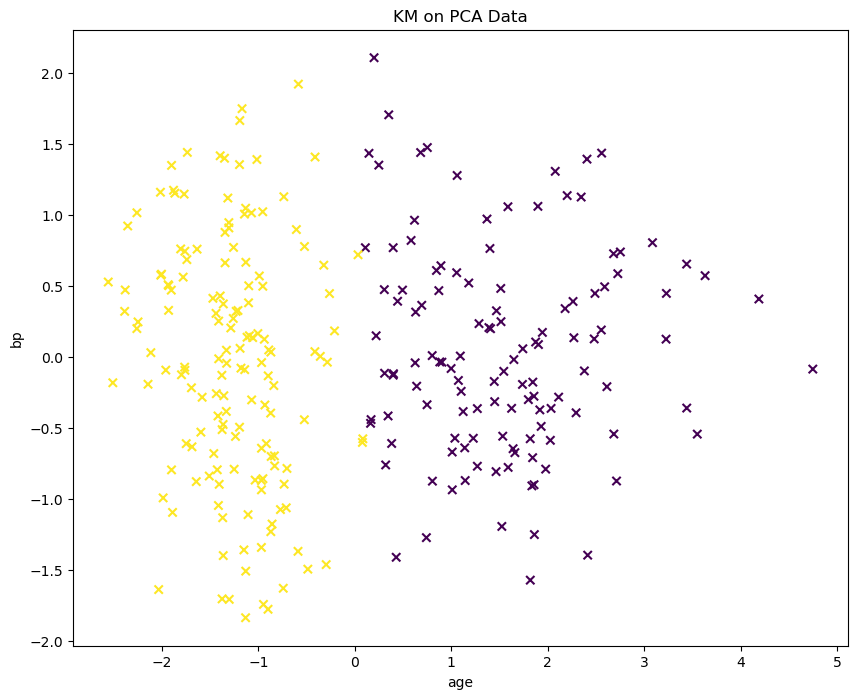

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(pc_scores["age"], pc_scores["bp"], c=cluster_labels_km2, cmap="viridis", marker="x")
plt.title("KM on PCA Data")
plt.xlabel("age")
plt.ylabel("bp")

# 8.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    x, X_without_outliers['class'], test_size=0.3, random_state=1)

# 9.

(1): KNN  
The KNN classifier classifies based on nearest neighbor samples, and has good adaptability to local data structure changes. In the case where we have processed the outsiders of the data, KNN is very little affected by extreme values and can give a more accurate classification.

(2): Logistic Regression:
The main reason why logistic regression is suitable is that its output is a probability value and has strong interpretability. Logistic regression is suitable for binary classification problems because the output probability value can be interpreted as the probability that the sample belongs to a certain category (notckd/ckd).

# 10.

ROC Curve:  
The ROC curve is a curve with the false positive rate on the horizontal axis and the true positive rate on the vertical axis. The value of AUC is the area under the ROC curve. The closer the AUC value is to 1, the better the classifier performs.

Accuracy:  
The accuracy score is the proportion of the number of samples correctly classified by the classifier to the total number of samples. When comparing two classifiers, you can choose the one with higher accuracy.

# 11~12.

# Logistic regression classifier before enhancement

In [21]:
def_log = LogisticRegression()
def_log.fit(X_train, y_train)
pred_prob = def_log.predict_proba(X_test)

In [22]:
df = pd.DataFrame(
    data = {'prob1': pred_prob[:,1], 'y_test': y_test}
    )

In [23]:
df['y_test_pred'] = df.prob1.map(lambda x: 1 if x>0.5 else 0)
cm = confusion_matrix(df.y_test, df.y_test_pred)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[41  0]
 [ 3 38]]


# KNN classifier before enhancement

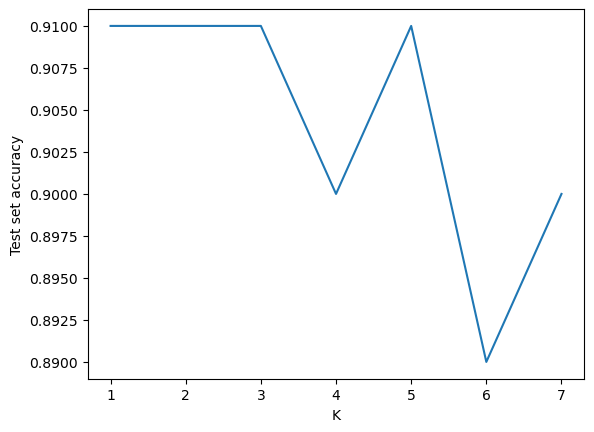

In [24]:
k_range = range(1, 8)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,8))
plt.show()

In [25]:
knn2 = neighbors.KNeighborsClassifier(
    n_neighbors = 3,
    algorithm='brute'
    )
# train the model
knn2.fit(X_train, y_train)
pred3 = knn2.predict(X_test)
print(round(metrics.accuracy_score(y_test, pred3),2))

0.91


In [26]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred3)
print(conf_mat)

[[41  0]
 [ 7 34]]


# Subset Selection for KNN

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [28]:
sfs = SFS(
    knn2,
    k_features=(1,24),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=5
    )
sfs = sfs.fit(X_train, y_train)

c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: Fut

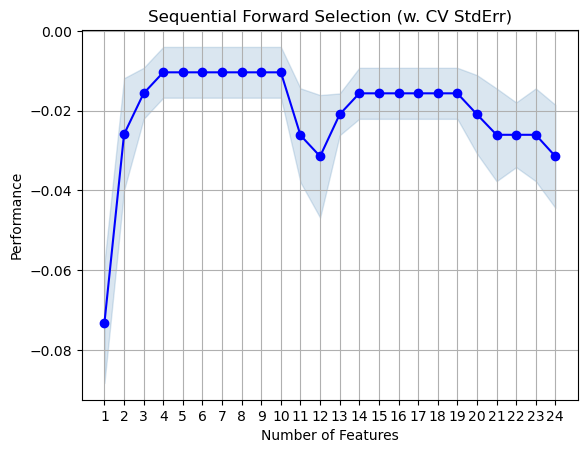

In [29]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()

In [30]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['bp', 'al', 'su', 'hemo'], dtype='object')

In [31]:
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]
sfs_m = neighbors.KNeighborsClassifier(
    n_neighbors=3,
    algorithm='brute'
)
sfs_m.fit(X_train_sfs, y_train)
sfs_test = sfs_m.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_test))

0.19127301391900148

In [32]:
cm_sfs=confusion_matrix(y_test, sfs_test)
print(cm_sfs)

total = sum(sum(cm_sfs))
accuracy = (cm_sfs[0,0]+cm_sfs[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm_sfs[1,1]/(cm_sfs[1,0]+cm_sfs[1,1]) 
print('Sensitivity : ', sensitivity )

specificity = cm_sfs[0,0]/(cm_sfs[0,0]+cm_sfs[0,1])
print('Specificity : ', specificity)


[[40  1]
 [ 2 39]]
Accuracy :  0.9634146341463414
Sensitivity :  0.9512195121951219
Specificity :  0.975609756097561


# Subset Selection for Logistic Regression

c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\zjb\.conda\envs\proj02\lib\site-packages\sklearn\model_selection\_validation.py:73: Fut

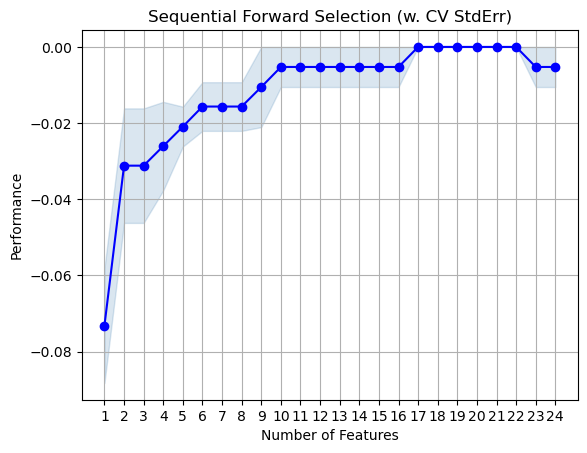

In [33]:
sfs = SFS(
    def_log,
    k_features=(1,24),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=5
    )
sfs = sfs.fit(X_train, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()

In [34]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'pe'],
      dtype='object')

In [35]:
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]
sfs_m = LogisticRegression()
sfs_m.fit(X_train_sfs, y_train)
sfs_test = sfs_m.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_test))

0.19127301391900148

In [36]:
cm_sfs=confusion_matrix(y_test, sfs_test)
print(cm_sfs)

[[40  1]
 [ 2 39]]


In [37]:
total = sum(sum(cm_sfs))
accuracy = (cm_sfs[0,0]+cm_sfs[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm_sfs[1,1]/(cm_sfs[1,0]+cm_sfs[1,1]) 
print('Sensitivity : ', sensitivity )

specificity = cm_sfs[0,0]/(cm_sfs[0,0]+cm_sfs[0,1])
print('Specificity : ', specificity)


Accuracy :  0.9634146341463414
Sensitivity :  0.9512195121951219
Specificity :  0.975609756097561


Both classifiers have the same accuracy score, but KNN classifier uses fewer predictor variables, which illustrates that the logistic regression classifier introduces some variables in feature selection that do not provide more information.

13.

In [38]:
importances = def_log.coef_[0]
for i, importance in enumerate(importances):
    print("feature {} importance：{}".format(i, importance))

feature 0 importance：0.25144477538949883
feature 1 importance：0.32234505445026157
feature 2 importance：-1.7215896811369729
feature 3 importance：1.160482372958357
feature 4 importance：0.23789489519065043
feature 5 importance：-0.04482764351004961
feature 6 importance：-0.4361720285321774
feature 7 importance：0.03466908922571648
feature 8 importance：0.074920151516639
feature 9 importance：0.902619314396416
feature 10 importance：0.5649005728472349
feature 11 importance：0.6960725987931383
feature 12 importance：-0.7529599106102006
feature 13 importance：-0.08892053217336719
feature 14 importance：-1.5724079599620162
feature 15 importance：-1.2750078482473612
feature 16 importance：0.08709589554195139
feature 17 importance：-0.7428970347944218
feature 18 importance：0.8243808617891811
feature 19 importance：0.7558474196917863
feature 20 importance：0.011148714547577642
feature 21 importance：-0.6959264128692211
feature 22 importance：1.0458358759310689
feature 23 importance：0.3833471079490144


These coefficients represent the direction and degree of influence of features on model prediction results. The coefficient of the variable pe is 1.0458358759310689. This means that foot edema may be a marker of kidney disease, a variable that can influence predictions. These coefficients represent the direction and degree of influence of features on model prediction results. The coefficient of the hemo variable is -1.5724079599620162. When the value of a feature increases, the probability of predicting the target variable to be a positive category decreases. This means that when a person has high hemoglobin levels, the probability of developing chronic kidney disease is lower, and this variable will also influence the prediction.

15.

I do the homework individually.

\newpage

## 3. Helper's name.

Helper's full name